# Importing nessesary files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Loading the data files

In [2]:
production_df=pd.read_csv('crop_production.csv',index_col=False)
rainfal_df=pd.read_csv('New_Rainfall.csv',index_col=False)

In [3]:
production_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [4]:
rainfal_df

,State_Name,Crop_Year,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7
1,Andaman and Nicobar Islands,2001,3080.9,104.7,878.7,1515.4,582.0
2,Andaman and Nicobar Islands,2002,2620.2,10.7,478.4,1525.6,605.5
3,Andaman and Nicobar Islands,2003,2355.9,52.2,465.0,1406.1,432.5
4,Andaman and Nicobar Islands,2004,2460.1,90.4,583.2,1392.2,394.2
...,...,...,...,...,...,...,...
490,West Bengal,2010,2612.3,25.2,590.0,1920.8,76.3
491,West Bengal,2011,2418.7,28.4,453.9,1858.6,77.7
492,West Bengal,2012,2632.2,29.2,407.7,2056.0,139.3
493,West Bengal,2013,2406.1,26.7,443.4,1717.6,218.5


# Data cleaning and pre procressing

In [5]:
production_df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
rainfal_df.isna().sum()

State_Name    0
Crop_Year     0
ANNUAL        2
Jan-Feb       1
Mar-May       0
Jun-Sep       1
Oct-Dec       1
dtype: int64

In [7]:
#Clean Production file.Drop missing values
production_df=production_df.dropna()

# Group the data by "State"
grouped = rainfal_df.groupby("State_Name")

# Fill missing values within each group
rainfal_df["ANNUAL"] = grouped["ANNUAL"].transform(lambda x: x.fillna(x.mean()))

rainfal_df['Jan-Feb '] = grouped['Jan-Feb '].transform(lambda x: x.fillna(x.mean()))
rainfal_df['Jun-Sep '] = grouped['Jun-Sep '].transform(lambda x: x.fillna(x.mean()))
rainfal_df['Oct-Dec   '] = grouped['Oct-Dec   '].transform(lambda x: x.fillna(x.mean()))

In [8]:
merged_df=pd.merge(rainfal_df,production_df,on=['Crop_Year','State_Name'],how='inner')
merged_df=merged_df.drop(['District_Name'],axis=1)
#we are droping districts to avoid unnessesary extra columns after getdummies function

In [9]:
merged_df

,State_Name,Crop_Year,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...,...,...,...,...
209193,West Bengal,2014,2322.6,26.9,394.2,1862.6,38.9,Summer,Rice,306.0,801.0
209194,West Bengal,2014,2322.6,26.9,394.2,1862.6,38.9,Summer,Sesamum,627.0,463.0
209195,West Bengal,2014,2322.6,26.9,394.2,1862.6,38.9,Whole Year,Sugarcane,324.0,16250.0
209196,West Bengal,2014,2322.6,26.9,394.2,1862.6,38.9,Winter,Rice,279151.0,597899.0


# All india crop production for specific crop

In [10]:
#merged_df['Crop'].unique()

In [11]:
#Group by Crop and sum the Area and Production values
grouped_df = merged_df.groupby('Crop').agg({'Area': 'sum', 'Production': 'sum'}).reset_index()

# Get top 6 crops by Area
top_10_area = grouped_df.sort_values(by='Production', ascending=False).head(6)

print("Top 10 Crops by Area:")
print(top_10_area)

Top 10 Crops by Area:
             Crop          Area    Production
28       Coconut   2.475523e+07  1.188316e+11
105     Sugarcane  6.536852e+07  4.479974e+09
94           Rice  6.358849e+08  1.377050e+09
118         Wheat  3.917093e+08  1.124226e+09
86         Potato  1.905154e+07  3.688534e+08
32   Cotton(lint)  1.332796e+08  2.647475e+08


In [12]:
Rice=merged_df[merged_df['Crop']=='Rice']
Sugarcane=merged_df[merged_df['Crop']=='Sugarcane']
Coconut=merged_df[merged_df['Crop']=='Coconut ']
Wheat=merged_df[merged_df['Crop']=='Wheat']
Potato=merged_df[merged_df['Crop']=='Potato']
#Banana=merged_df[merged_df['Crop']=='Banana']
l1=[Rice,Sugarcane,Coconut,Wheat,Potato]
crop_list=['Rice','Sugarcane','Coconut','Wheat','Potato']


# Aanalysis of the dataset

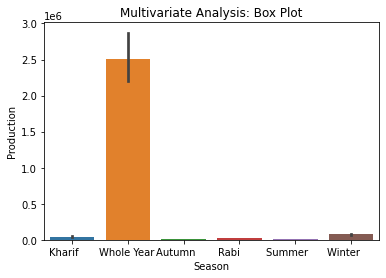

In [13]:
# Box plot for categorical vs. numerical variables
sns.barplot(data=merged_df, x=merged_df['Season'], y=merged_df['Production'])
plt.title("Multivariate Analysis: Box Plot")
plt.show()

In [14]:
#sns.lineplot(data["Crop_Year"],data["Production"])

# Data visualization for Rice

In [15]:
Rice=merged_df[merged_df['Crop']=='Rice']

<AxesSubplot:xlabel='Season', ylabel='Production'>

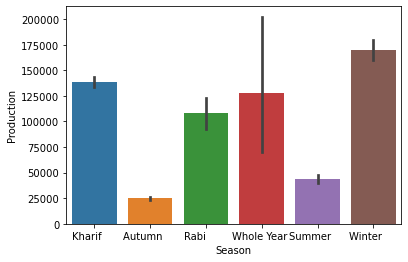

In [16]:
sns.barplot("Season","Production",data=Rice)

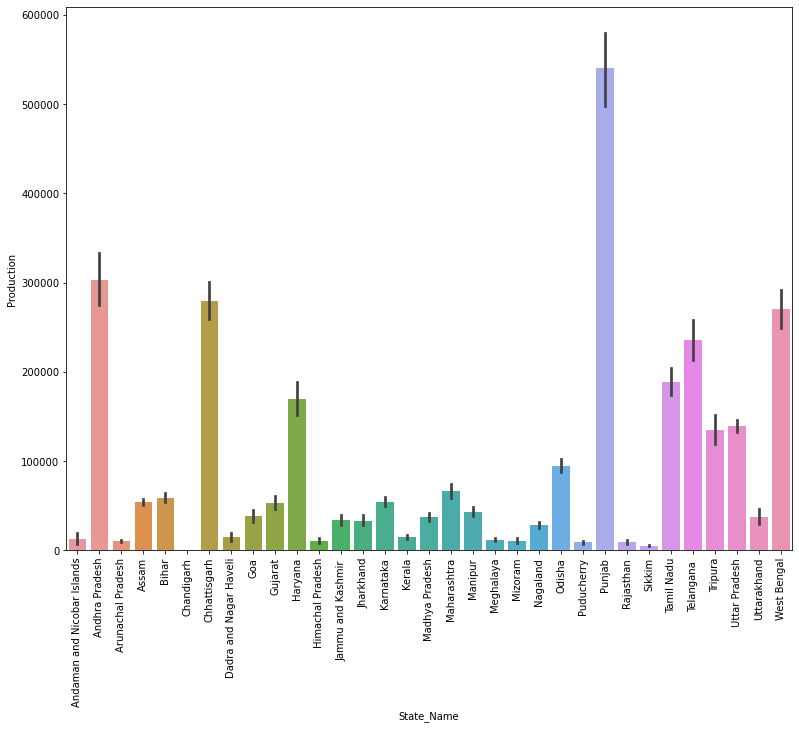

In [17]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=Rice)
plt.xticks(rotation=90)
plt.show()

# Production of rice per year

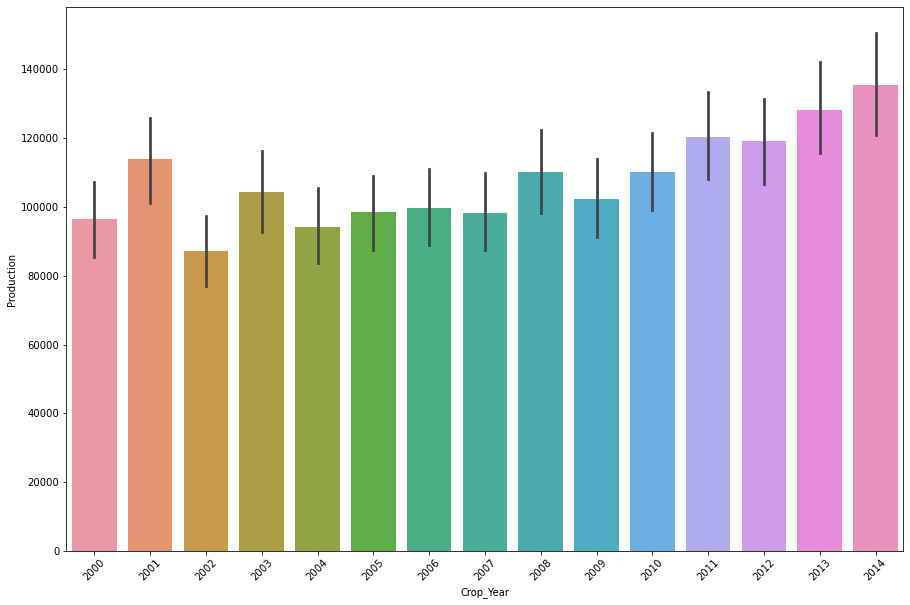

In [18]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=Rice)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

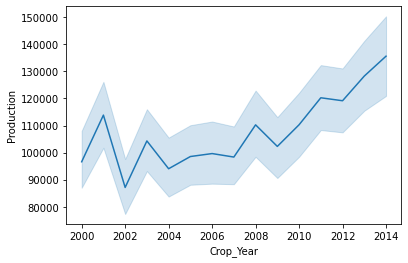

In [19]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.lineplot(Rice["Crop_Year"],Rice['Production'])
    plt.show

# Annual rain fall

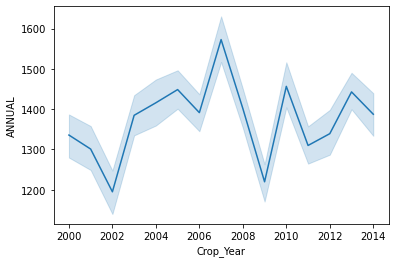

In [20]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.lineplot(Rice["Crop_Year"],Rice['ANNUAL'])
    plt.show()
    


# Area variatipn for crop in various years

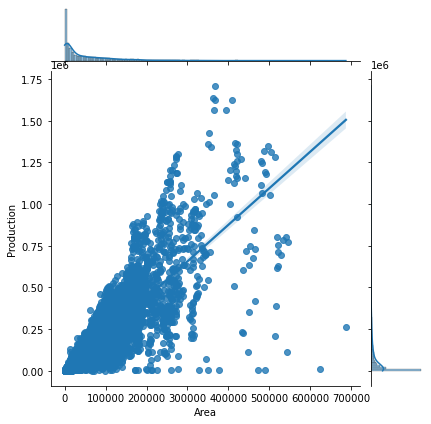

In [21]:
sns.jointplot("Area","Production",data=Rice,kind="reg")

In [22]:
merged_df['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

# Insite 

From Data Visualization: Rice production is mostly depends on Season, Area, State(place).

# Coconut

<AxesSubplot:xlabel='Season', ylabel='Production'>

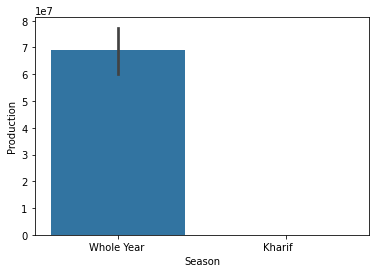

In [23]:
sns.barplot("Season","Production",data=Coconut)

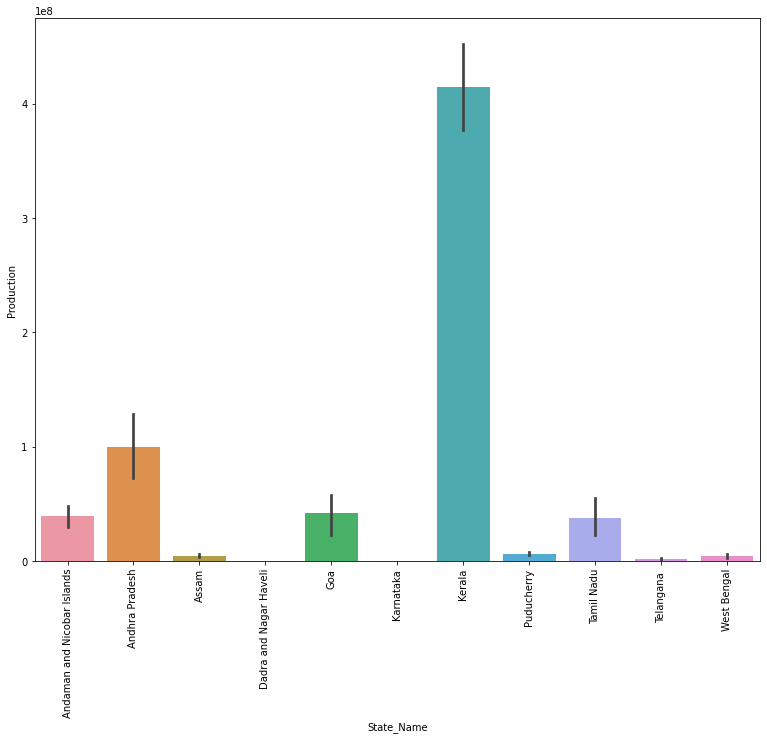

In [24]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=Coconut)
plt.xticks(rotation=90)
plt.show()

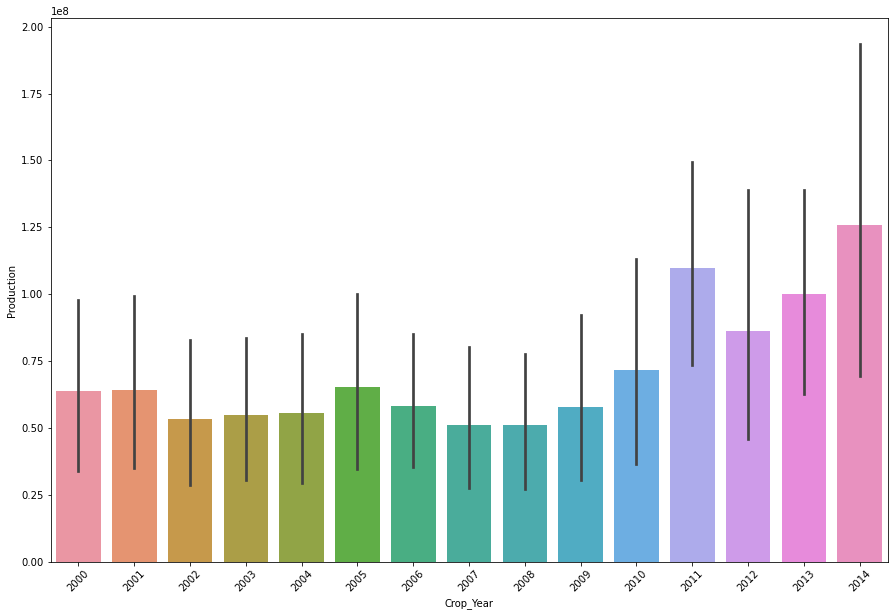

In [25]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=Coconut)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

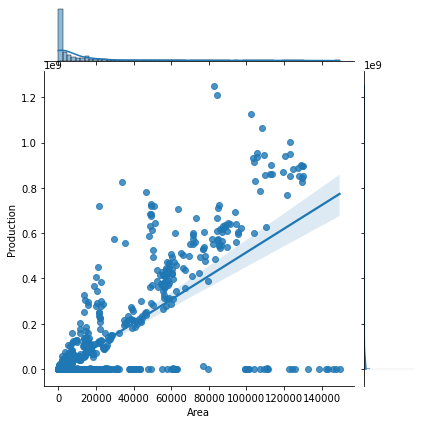

In [26]:
sns.jointplot("Area","Production",data=Coconut,kind="reg")

# Insight from Cocunut Production

1.cocunut production is directly proportional to area
2.its production is also gradually increasing over a time of period
3.production is highin kerala state
4.it does not depends on season

# Sugarcane

<AxesSubplot:xlabel='Season', ylabel='Production'>

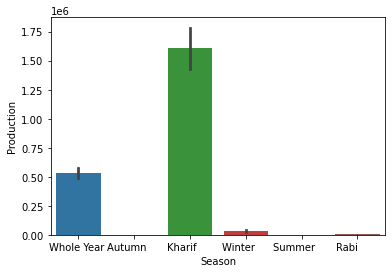

In [27]:
sns.barplot("Season","Production",data=Sugarcane)
#Here we can see even if sugarcane is 12 month crop kharip season shows more production since harvest is done in that season 

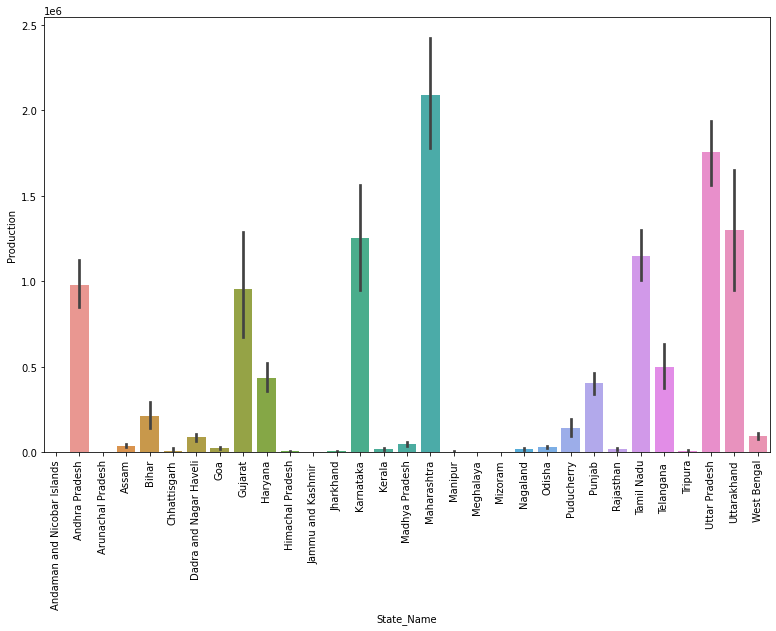

In [28]:
plt.figure(figsize=(13,8))
sns.barplot("State_Name","Production",data=Sugarcane)
plt.xticks(rotation=90)
plt.show()

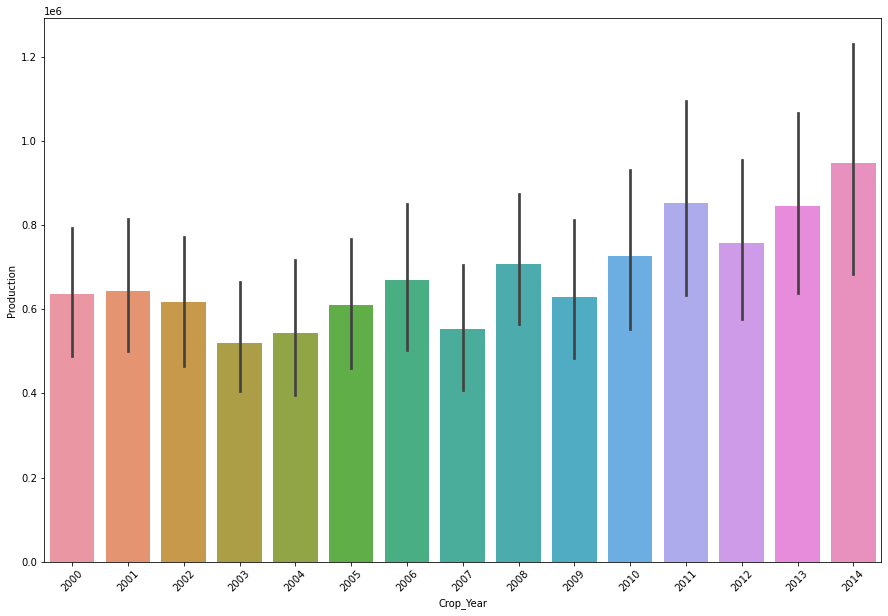

In [29]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=Sugarcane)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

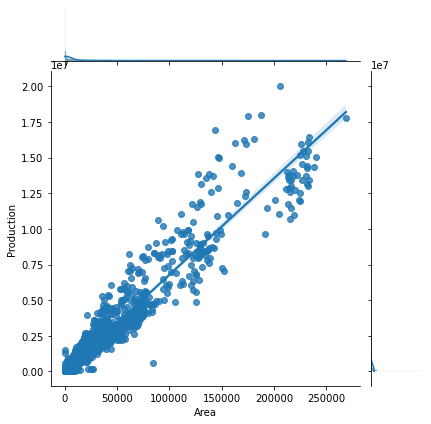

In [30]:
sns.jointplot("Area","Production",data=Sugarcane,kind="reg")

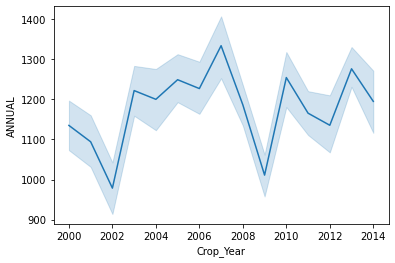

In [31]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.lineplot(Sugarcane["Crop_Year"],Sugarcane['ANNUAL'])
    plt.show()

# Insighits:
1.Sugarecane production is directly proportional to area
2.And the production is high in some state only.
3.Its yield is directly propotional to rainfall 

# Model Building

In [32]:
# Create a Randomforest Regressor instance
model_rf = RandomForestRegressor()
# Create a LinearRegression instance
model_lr = LinearRegression()
# Create a KNN Regressor instance
model_knn = KNeighborsRegressor(n_neighbors=5)

# Analysing model for each crop

In [33]:
randomforest=[]
linearregression=[]
knn=[]
n=0        
for i in l1:
    #sns.lineplot(i["YEAR"],i['Production'])
    #plt.show
    crop=pd.get_dummies(i)
    
    Train_df=crop[crop['Crop_Year']!=2014]
    Test_df=crop[crop['Crop_Year']==2014]
    x_train=Train_df.drop('Production',axis=1)
    y_train=Train_df['Production']
    x_test=Test_df.drop('Production',axis=1)
    y_test=Test_df['Production']
    model_rf.fit(x_train,y_train)
    model_lr.fit(x_train,y_train)
    model_knn.fit(x_train,y_train)
    preds_rf = model_rf.predict(x_test)
    preds_lr=model_lr.predict(x_test)
    preds_knn=model_knn.predict(x_test)
    print('**********')
    print(crop_list[n])
    n=n+1
    print('mean squared error of the crop is ',mean_squared_error(y_test,preds_rf))
    print('mean squared error of the crop is ',mean_squared_error(y_test,preds_lr))
    print('r2_score of crop in Random forest',r2_score(y_test,preds_rf))
    print('r2_score of crop in linear regression',r2_score(y_test,preds_lr))
    print('r2_score of crop in knn regression',r2_score(y_test,preds_knn))
    randomforest.append(r2_score(y_test,preds_rf))
    linearregression.append(r2_score(y_test,preds_lr))
    knn.append(r2_score(y_test,preds_knn))
    
    print('-------')
    

**********
Rice
mean squared error of the crop is  3087968488.1622286
mean squared error of the crop is  6614835186.595307
r2_score of crop in Random forest 0.9321782814525573
r2_score of crop in linear regression 0.8547169467619844
r2_score of crop in knn regression 0.8445229720405822
-------
**********
Sugarcane
mean squared error of the crop is  217231163085.38852
mean squared error of the crop is  435372948266.26294
r2_score of crop in Random forest 0.9699807984377996
r2_score of crop in linear regression 0.9398357578944737
r2_score of crop in knn regression 0.9184290677044611
-------
**********
Coconut
mean squared error of the crop is  6820040970241646.0
mean squared error of the crop is  2.415748278455168e+16
r2_score of crop in Random forest 0.8922562739108213
r2_score of crop in linear regression 0.6183575407391486
r2_score of crop in knn regression 0.8366966825414366
-------
**********
Wheat
mean squared error of the crop is  10249672373.688208
mean squared error of the crop 

In [34]:
print(np.mean(linearregression))
print(np.mean(randomforest))
print(np.mean(knn))

0.8241168096086845
0.9000969153273625
0.845872907790084


# visualization for states

# Production per year

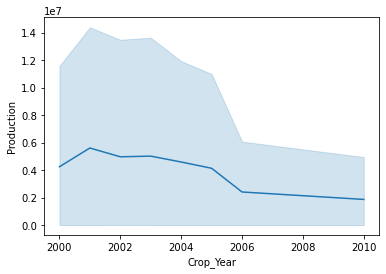

In [35]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    state1=merged_df[merged_df['State_Name']=='Andaman and Nicobar Islands']
    sns.lineplot(state1["Crop_Year"],state1['Production'])

# Annual rainfall 

<AxesSubplot:xlabel='Crop_Year', ylabel='ANNUAL'>

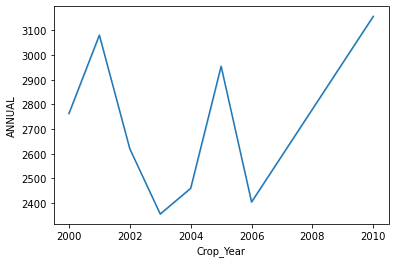

In [36]:
state1=merged_df[merged_df['State_Name']=='Andaman and Nicobar Islands']
sns.lineplot(state1["Crop_Year"],state1['ANNUAL'])

In [37]:
#List of sates
states=['Andaman and Nicobar Islands','Andhra Pradesh' ,'Arunachal Pradesh',
  'Bihar','Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli',
 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ',
 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha','Puducherry', 'Punjab',
 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ', 'Tripura', 'Uttar Pradesh',
 'Uttarakhand', 'West Bengal']



# Analysing crops per state

In [38]:
randomforest=[]
linearregression=[]
knn=[]
n=0
for i in states:
    state1=merged_df[merged_df['State_Name']==i]
    state1=pd.get_dummies(state1)
    

    x=state1.drop('Production',axis=1)
    y=state1['Production']
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

    model_rf.fit(x_train,y_train)
    model_lr.fit(x_train,y_train)
    model_knn.fit(x_train,y_train)
    preds_rf = model_rf.predict(x_test)
    preds_lr=model_lr.predict(x_test)
    preds_knn=model_knn.predict(x_test)
    print('**********')
    print(states[n])
    n=n+1
    print('mean squared error of the crop in randomforest regression ',mean_squared_error(y_test,preds_rf))
    print('mean squared error of the crop in linear regression  ',mean_squared_error(y_test,preds_lr))
    print('r2_score of crop in Random forest',r2_score(y_test,preds_rf))
    print('r2_score of crop in linear regression',r2_score(y_test,preds_lr))
    print('r2_score of crop in knn regression',r2_score(y_test,preds_knn))
    randomforest.append(r2_score(y_test,preds_rf))
    linearregression.append(r2_score(y_test,preds_lr))
    knn.append(r2_score(y_test,preds_knn))
    print('-------')

**********
Andaman and Nicobar Islands
mean squared error of the crop in randomforest regression  149472466377.36877
mean squared error of the crop in linear regression   30185176882040.28
r2_score of crop in Random forest 0.9889995441204634
r2_score of crop in linear regression -1.2214840937231406
r2_score of crop in knn regression -2.1808504537886226
-------
**********
Andhra Pradesh
mean squared error of the crop in randomforest regression  115890335384284.02
mean squared error of the crop in linear regression   975127751856448.6
r2_score of crop in Random forest 0.908296127504332
r2_score of crop in linear regression 0.22838267119763744
r2_score of crop in knn regression 0.16232510638871755
-------
**********
Arunachal Pradesh
mean squared error of the crop in randomforest regression  1555600.0964151924
mean squared error of the crop in linear regression   4459194.831418285
r2_score of crop in Random forest 0.9293635057464258
r2_score of crop in linear regression 0.7975174398543003

In [39]:
print(np.mean(linearregression))
print(np.mean(randomforest))
print(np.mean(knn))

0.4432895742614604
0.8321094538513709
-0.03538483907028796


# As we can see the r2_score is best for randomforestregression in most of the cases.
# so for prediction crop we use randomforest regression